# Project 1: Hierarchical Poisson Factorization
## Building Recommender Systems With Markovian Inference

TODO: introduction and overview

## Dataset exploration: ModCloth ratings
Taken from: https://www.kaggle.com/datasets/ruchi798/marketing-bias-in-product-recommendations
TODO: motivation of choice, short description

In [1]:
using CSV
using DataFrames
using Plots
using Dates
using Statistics
using StatsBase
using Pipe

# Median for datetime, taken from Reddit: 
# https://www.reddit.com/r/Julia/comments/hrfpei/defining_a_median_method_for_datetime/
Statistics.median(dateTimeArray::Array{DateTime,1}) =  DateTime(Dates.UTM(Int(round(median(Dates.value.(dateTimeArray))))))

In [2]:
ratings_df = CSV.read("modcloth.csv", DataFrame)

function prepare!(df)
    parse_timestamp = timestamp -> DateTime(replace(timestamp, "+00:00" => ""), "y-m-d H:M:S.s")
    ratings_df.time = map(parse_timestamp, ratings_df.timestamp)
    ratings_df.rating_score = ratings_df.rating
    select!(ratings_df, Not([:timestamp, :brand, :year, :rating, :fit, :size, :user_attr, :model_attr, :split]))
    dropmissing!(ratings_df)
end

prepare!(ratings_df)
@assert size(ratings_df) == (99893, 5) 
summary(ratings_df)

"99893×5 DataFrame"

In [3]:
first(ratings_df, 10)

Row,item_id,user_id,category,time,rating_score
,Int64,String,String15,DateTime,Int64
1,7443,Alex,Dresses,2010-01-21T08:00:00,4
2,7443,carolyn.agan,Dresses,2010-01-27T08:00:00,3
3,7443,Robyn,Dresses,2010-01-29T08:00:00,4
4,7443,De,Dresses,2010-02-13T08:00:00,4
5,7443,tasha,Dresses,2010-02-18T08:00:00,4
6,7443,gina.chihos,Dresses,2010-02-25T08:00:00,5
7,7443,Kim,Dresses,2010-02-26T08:00:00,2
8,7443,jess.betcher,Dresses,2010-03-26T07:00:00,5
9,7443,Elissa,Dresses,2010-04-06T07:00:00,4


In [4]:
describe(ratings_df, :first, :eltype, :nunique, :min, :median, :max)

Row,variable,first,eltype,nunique,min,median,max
,Symbol,Any,DataType,Union…,Any,Any,Any
1,item_id,7443,Int64,,6454,77878.0,155950
2,user_id,Alex,String,44784,"""Ferrari"")",,😊
3,category,Dresses,String15,4,Bottoms,,Tops
4,time,2010-01-21T08:00:00,DateTime,14741,2010-01-21T08:00:00,2016-01-26T08:00:00,2019-06-29T13:55:16.542
5,rating_score,4,Int64,,1,5.0,5


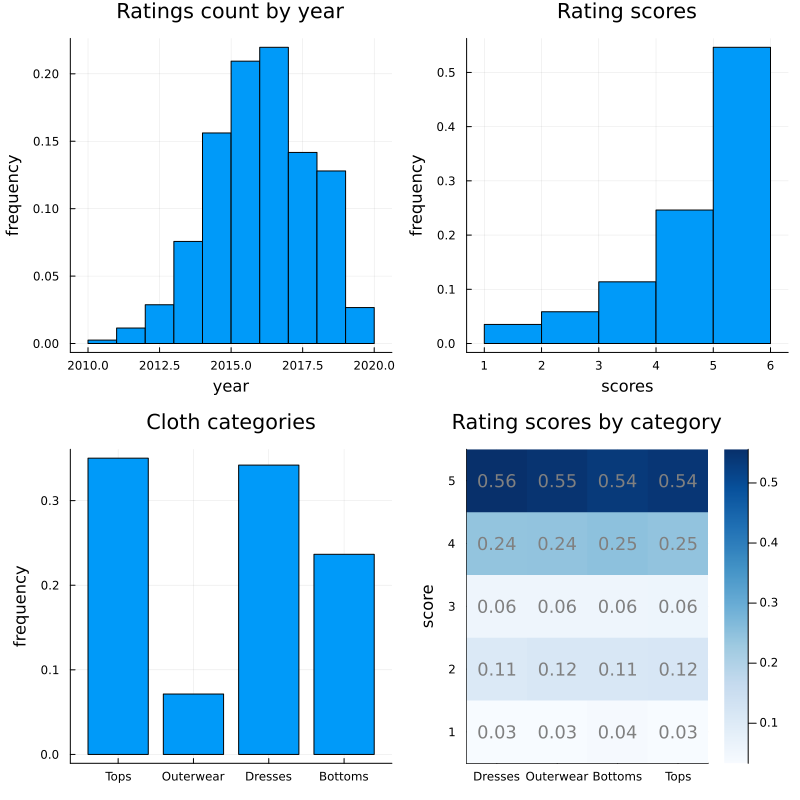

In [5]:
scores_by_categ = @pipe groupby(ratings_df, :category) |> combine(_, :rating_score .=> proportionmap)
scores_matrix = scores_by_categ.rating_score_proportionmap .|> values .|> collect .|> reverse
scores_matrix = hcat(scores_matrix...)

function heatmap_annotation(matrix)
    rows, columns = size(scores_matrix)
    return [
        (j - 0.5, i, 
            text(
                round(matrix[i, j], digits=2),
                12,
                :gray,
                :center
            ), 
        ) for i in 1:rows for j in 1:columns
    ]
end

histograms = [
    histogram(
        map(t -> Dates.year(t), ratings_df.time), 
        title="Ratings count by year",
        label="ratings",
        xlabel="year",
        ylabel="frequency",
        bins=10, 
        normalize=true
    ),
    
    histogram(
        ratings_df.rating_score, 
        title="Rating scores",
        label="ratings",
        xlabel="scores",
        ylabel="frequency",
        bins=6, 
        normalize=true
    ),
    
    bar(
        proportionmap(ratings_df.category),
        title="Cloth categories",
        ylabel="frequency",
    ),
    
    heatmap(
        scores_by_categ.category, 
        1:5, 
        scores_matrix,
        title="Rating scores by category",
        ylabel="score",
        c=:Blues,
        annotations=heatmap_annotation(scores_matrix),
    )
]

plot(histograms..., layout=(2,2), legend=false, size=(800, 800))

## Julia dependencies

In [6]:
using Pkg

Pkg.add("Pipe")
Pkg.add("StatsBase")
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
